# Metropolis-Hastings
Metropolis-Hastings algorithm is a sampling algorithm to sample from high-dimensional, difficult to sample directly (due to intractable integrals) distributions or functions.

It's an MCMC algorithm, just like Gibbs Sampling. It's MC (Markov Chain) because to get the next sample, one only need to consider the current sample. It's MC (Monte Carlo) because it generates random sample which we could use to compute integrals or numerical results. For example, in the probability distribution setting, the integrals we may want to compute are the expected value, mode, median, etc.

The core of the algorithm lies in the proposal distribution `Q(x -> x')`, which is used to suggest the next candidate of the Markov Chain given the current state/sample, and the acceptance probability alpha which is used to decide whether we accept the new sample, or stay with the current sample.

The acceptance probability alpha is found by this equation:

`alpha = min(1, P(x')/P(x) * Q(x' -> x)/Q(x -> x'))`

Where P(x) is the target distribution, namely the distribution we want to sample from.

When proposal distribution `Q(x -> x')` is symmetric, `Q(x -> x') = Q(x' -> x)`, which means that the ratio becomes one and the alpha will just be:

`alpha = min(1, P(x')/P(x))`

This is the Metropolis algorithm. The Metropolis algorithm is a special case of the Metropolis-Hastings algorithm where the proposal distribution is symmetric. An example of a symmetric distribution is the Gaussian or normal distribution.

Let's devour the code.

In [7]:
import numpy as np
import scipy.stats as st
import seaborn as sns

## The means for the bivariate normal distribution
mus = np.array([5, 5])

## The covariance matrix for the bivariate normal distribution
sigmas = np.array([[1, .9],[.9, 1]])

## A function for a circle centered at (1, 2) with a radius of 3
def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2

## A bivariate normal distribution with means of mus and a covariance matrix sigmas
def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean = mus, cov = sigmas)

## The proposal distribution is a standard normal distribution
def proposal(size = 1):
    return np.random.normal(size = size)


def metropolis_hastings(P, iter = 1000):
    ## Initialize starting point
    x, y = 0., 0.
    
    ## An array to store our samples
    samples = np.zeros((iter, 2))

    for i in range(iter):
        ## Sample from the proposal distribution and add it to x and y to get new x and y
        x_new, y_new = np.array([x, y]) + proposal(size = 2)
        
        ## If alpha is greater than or equal to some uniform random number from 0 to 1
        ## We accept the new x, y
        if np.random.rand() <= P(x_new, y_new) / P(x, y):
            x, y = x_new, y_new
            
        ## Append the accepted x, y into the samples array
        samples[i] = np.array([x, y])
        
    return samples

In the code, I skipped the `min(1, P(x')/P(x))` step for the alpha calculation, and just calculate `P(x') / P(x)`, because we only care about whether or not alpha is bigger than some uniform random number `[0, 1]`, so when `P(x') / P(x) > 1`, alpha will always be bigger than the random number.

The first function I’m sampling from is a circle centered in `(1, 2)` with radius of `3`. Let’s see the result.

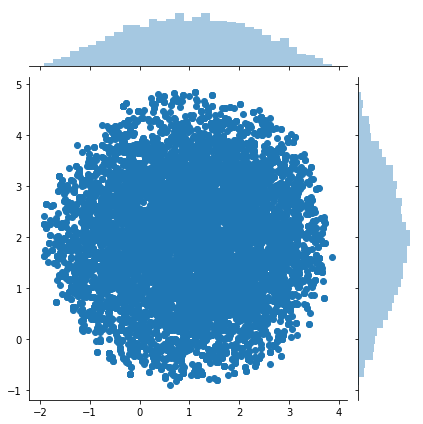

In [5]:
samples = metropolis_hastings(circle, iter = 10000)
sns.jointplot(samples[:, 0], samples[:, 1])

It indeed looks like a circle, doesn't it?

Now let's sample from a Bivariate Normal distribution.

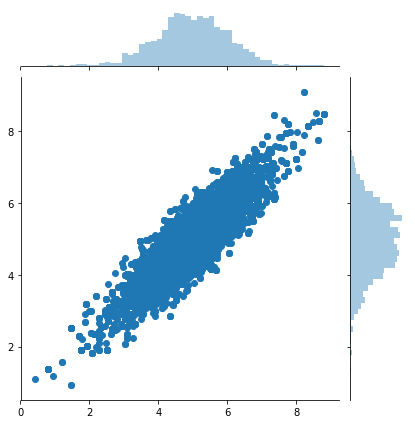

In [6]:
samples = metropolis_hastings(pgauss, iter=10000)
sns.jointplot(samples[:, 0], samples[:, 1])